In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
na_values = ['UNKNOWN', 'unknown', 'Unknown', 'Unknown ve', '(0.0, 0.0)', 'Unspecified']

df = pd.read_csv('crashes.csv', na_values=na_values)

/tmp/ipykernel_2640/2939924353.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crashes.csv', na_values=na_values)


## Data exploration

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078796 entries, 0 to 2078795
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [36]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           646784
ZIP CODE                          647034
LATITUDE                          233855
LONGITUDE                         233855
LOCATION                          238239
ON STREET NAME                    441491
CROSS STREET NAME                 786131
OFF STREET NAME                  1729678
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1     714391
CONTRIBUTING FACTOR VEHICLE 2    1801175
CONTRIBUTING FACTOR VEHICLE 3    2068727
CONTRIBUTING FACTOR VEHICLE 4    2076892
CONTRIBUTING FACTOR VEHICLE 5    2078275
COLLISION_ID                           0
VEHICLE TYPE COD

In [37]:
# defining the dataset ID
df.set_index('COLLISION_ID', inplace=True)

Dropping columns that have more than 30% null values

### Handling missing values and irrelevant data

In [38]:
threshold = len(df) * 0.3
df.dropna(thresh=threshold, axis=1, inplace=True)

In [39]:
df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          646784
ZIP CODE                         647034
LATITUDE                         233855
LONGITUDE                        233855
LOCATION                         238239
ON STREET NAME                   441491
CROSS STREET NAME                786131
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1    714391
VEHICLE TYPE CODE 1               33709
VEHICLE TYPE CODE 2              479425
dtype: int64

Deleting logical irrelevant columns

In [40]:
df.drop(['VEHICLE TYPE CODE 2', 'ZIP CODE', 'LATITUDE', 'LONGITUDE'], axis=1, inplace=True)

Simplifying feature names

In [41]:
df.rename(columns={
    'CRASH DATE': 'DATE',
    'CRASH TIME': 'TIME',
    'LATITUDE': 'LAT',
    'LONGITUDE': 'LON',
    'ON STREET NAME': 'ON_STREET',
    'CROSS STREET NAME': 'CROSS_STREET',
    'NUMBER OF PERSONS INJURED': 'INJURED',
    'NUMBER OF PERSONS KILLED': 'KILLED',
    'NUMBER OF PEDESTRIANS INJURED': 'PED_INJURED',
    'NUMBER OF PEDESTRIANS KILLED': 'PED_KILLED',
    'NUMBER OF CYCLIST INJURED': 'CY_INJURED',
    'NUMBER OF CYCLIST KILLED': 'CY_KILLED',
    'NUMBER OF MOTORIST INJURED': 'MOT_INJURED',
    'NUMBER OF MOTORIST KILLED': 'MOT_KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1': 'FACTOR',
    'CONTRIBUTING FACTOR VEHICLE 2': 'FACTOR2',
    'VEHICLE TYPE CODE 1': 'VEHICLE'
    }, inplace=True)

#### Cleaning the target variable

Dropping all raws with null in the target varible

In [42]:
df.dropna(subset=['VEHICLE'], inplace=True)

df.dtypes

DATE             object
TIME             object
BOROUGH          object
LOCATION         object
ON_STREET        object
CROSS_STREET     object
INJURED         float64
KILLED          float64
PED_INJURED       int64
PED_KILLED        int64
CY_INJURED        int64
CY_KILLED         int64
MOT_INJURED       int64
MOT_KILLED        int64
FACTOR           object
VEHICLE          object
dtype: object

Finding and excluding outliers

In [43]:
df.describe()

,INJURED,KILLED,PED_INJURED,PED_KILLED,CY_INJURED,CY_KILLED,MOT_INJURED,MOT_KILLED
count,2.045070e+06,2.045060e+06,2.045087e+06,2.045087e+06,2.045087e+06,2.045087e+06,2.045087e+06,2.045087e+06
mean,3.069504e-01,1.464016e-03,5.124281e-02,7.109722e-04,2.665950e-02,1.124647e-04,2.255938e-01,6.195335e-04
std,7.010902e-01,4.041061e-02,2.336248e-01,2.712736e-02,1.631134e-01,1.065035e-02,6.647724e-01,2.724651e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00


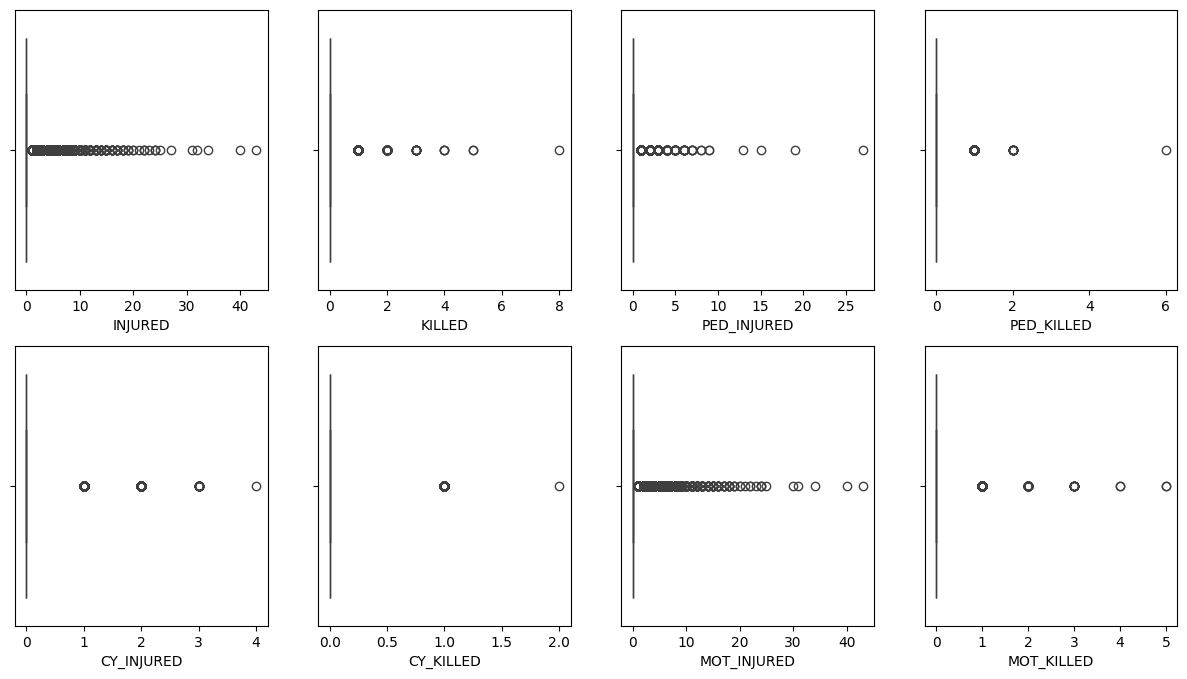

In [52]:
numerical_columns = df.select_dtypes(include='number').columns.tolist()

img, axs = plt.subplots(2, 4, figsize=(15, 8))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axs[i//4, i%4])

plt.show()

#### Filling missing values with their mode and mean for categorical and numerical values respectively

In [ ]:
# filling all categorical missing values with their mode
categorical_columns = df.select_dtypes(include='object').columns.tolist()

for column in categorical_columns:
    df.fillna({column: df[column].mode()[0]}, inplace=True)

# filling numberical missing values with its mean
numerical_columns = df.select_dtypes(include='number').columns.tolist()

for column in numerical_columns:
    df.fillna({column: df[column].mean()}, inplace=True)


In [ ]:
df.isnull().sum()

DATE            0
TIME            0
BOROUGH         0
LAT             0
LON             0
LOCATION        0
ON_STREET       0
CROSS_STREET    0
INJURED         0
KILLED          0
PED_INJURED     0
PED_KILLED      0
CY_INJURED      0
CY_KILLED       0
MOT_INJURED     0
MOT_KILLED      0
FACTOR          0
VEHICLE         0
dtype: int64

### Parsing categorical colums to numeric representation

Based on that most of the categorical columns have many categories One-Hot enconding is not suitable therefore Label Encoding would be a better solution

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include='object').columns.tolist()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


Parsing DateTime columns to integer

In [ ]:
# converting the date and time columns to datetime
date_as_int = pd.to_datetime(df['DATE'])
time_as_int = pd.to_datetime(df['TIME'], format='%H:%M:%S', errors='coerce').dt.time

df['DATE'] = date_as_int.astype(int)
df['TIME'] = time_as_int.astype(int)


Normalizing the data

## Training and model selection

#### Spliting sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('VEHICLE', axis=1)
y = df['VEHICLE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2045087 entries, 4455765 to 4714708
Data columns (total 18 columns):
 #   Column        Dtype  
---  ------        -----  
 0   DATE          int64  
 1   TIME          int64  
 2   BOROUGH       int64  
 3   LAT           float64
 4   LON           float64
 5   LOCATION      int64  
 6   ON_STREET     int64  
 7   CROSS_STREET  int64  
 8   INJURED       float64
 9   KILLED        float64
 10  PED_INJURED   int64  
 11  PED_KILLED    int64  
 12  CY_INJURED    int64  
 13  CY_KILLED     int64  
 14  MOT_INJURED   int64  
 15  MOT_KILLED    int64  
 16  FACTOR        int64  
 17  VEHICLE       int64  
dtypes: float64(4), int64(14)
memory usage: 296.5 MB


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier 
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.35423868876186376


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.08804013515297615


## References

- https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/
- https://www.linkedin.com/pulse/title-label-encoding-one-hot-data-preprocessing-shivani-singh